In [180]:
import pandas as pd
import numpy as np
import re
import datetime

data=pd.read_csv('saomai.csv',delimiter=" ")
if data.columns[0]!='TIME':
    data=pd.read_csv('eclipse_test.csv',delimiter=",")
if data.columns[0]!='TIME':
    data=pd.read_csv('eclipse_test.csv',delimiter=";")
if "." in data['TIME'][0]:
    data['TIME']= data['TIME'].str.split(".",n=1,expand=True)[0]
data.replace("---",np.NaN,inplace=True)
for col in data.select_dtypes('object').columns:
    try:
        data[col]=data[col].astype(float)
    except ValueError:
        continue
data = data.round(3)
data['TIME']=data['TIME'].apply(lambda x : datetime.datetime.strptime(x, '%H:%M:%S'))
# datetime.datetime.strptime(data['TIME'], '%H:%M:%S').time()
# data['TIME']=pd.to_datetime(data['TIME'],format='%H:%M:%S').dt.time
data.to_csv("test.csv",float_format='%.3f',date_format='%H:%M:%S')

Active =['ppc:P[^F]','pccm.*:ACTP_TOT',"epm.*:ACTP_TOT","pccs.*:ACTP_TOT"]
P = [l for k in Active for l in data.columns if re.match(k,l)]
Reactive =['ppc:Q.*','pccm.*:REACTP_TOT',"epm.*:REACTP_TOT","pccs.*:REACTP_TOT"]
Q = [l for k in Reactive for l in data.columns if re.match(k,l)]
Voltage =['ppc:V','pccm.*:VABC_AVG',"epm.*:VABC_AVG","pccs.*:VABC_AVG"]
V = [l for k in Voltage for l in data.columns if re.match(k,l)]
Frequency=['ppc:F','pccm.*:F',"epm.*:F","pccs.*:F"]
F = [l for k in Frequency for l in data.columns if re.match(k,l)]
PowerFactor=['ppc:PF','pccm.*:PF',"epm.*:PF","pccs.*:PF"]
PF = [l for k in PowerFactor for l in data.columns if re.match(k,l)]

Active_Setpoint = ['apc:PSP']
PSP = [l for k in Active_Setpoint for l in data.columns if re.match(k,l)]
Reactive_Setpoint = ['rpc:QSP']
QSP = [l for k in Reactive_Setpoint for l in data.columns if re.match(k,l)]
QV_Setpoint = ['rpc:VSP']
QV_VSP = [l for k in QV_Setpoint for l in data.columns if re.match(k,l)]
AVR_Setpoint = ['avr:VSP']
AVR_VSP = [l for k in AVR_Setpoint for l in data.columns if re.match(k,l)]
Frequency_Setpoint = ['apc:FSP']
FSP = [l for k in Frequency_Setpoint for l in data.columns if re.match(k,l)]
PowerFactor_Setpoint = ['pfc:PFSP']
PFSP = [l for k in PowerFactor_Setpoint for l in data.columns if re.match(k,l)]

Active_En = ['apc:En']
PEn = [l for k in Active_En for l in data.columns if re.match(k,l)]
Reactive_En = ['rpc:En']
QEn = [l for k in Reactive_En for l in data.columns if re.match(k,l)]
QV_En = ['rpc:VCEn']
QVEn = [l for k in QV_En for l in data.columns if re.match(k,l)]
AVR_En = ['avr:En']
AVREn = [l for k in AVR_En for l in data.columns if re.match(k,l)]
Frequency_En = ['apc:FCEn']
FEn = [l for k in Frequency_En for l in data.columns if re.match(k,l)]
PowerFactor_En = ['pfc:En']
PFEn = [l for k in PowerFactor_En for l in data.columns if re.match(k,l)]

def plot_P(TIME,P,PSP,PEN,PDB):
    %matplotlib notebook
    import matplotlib.pyplot as plt
    import matplotlib.dates as mdates
    from matplotlib.ticker import AutoMinorLocator, FormatStrFormatter


    font = {'family': 'serif',
        'color':  'black',
        'weight': 'bold',
        'size': 14,
        }

    legend_font = {'weight': 'bold',
                  'size':10}

    ticks_font = {'fontsize':8,
                 'fontweight':'bold'}

    #Setpoint only when control is enabled
    PSP_copy = PSP.copy()
    PSP_copy[PEN==0]=np.NaN

    #Creat Figure

    fig, ax = plt.subplots(figsize=(10,5))

    #Plot Measurement
    l1,=ax.plot(TIME,P,label='P(kVAr)',linewidth=1)
    #Plot Setpoints
    l2,=ax.plot(TIME,PSP_copy,label='P Setpoint',linewidth=0.5)
    ax.fill_between(TIME.values,PSP_copy-PDB,PSP_copy+PDB,alpha=0.7,facecolor=l2.get_color())

    #Formatting axis
    
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.set_facecolor('whitesmoke')
    ax.grid(which='both',ls='--',lw=1,alpha=0.5)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
    ax.xaxis.set_minor_locator(AutoMinorLocator())        
    ax.yaxis.set_minor_locator(AutoMinorLocator())

    ax.set_ylim(-0.1*(max(P.max(),PSP.max())),max(P.max(),PSP.max())*1.1)
    leg = ax.legend(bbox_to_anchor=(0.5, 1.1),loc='upper center',ncol=2,prop=legend_font,
                   fancybox=True, shadow=True)
    fig.autofmt_xdate()
    ax.set_ylabel('P (kW)',fontdict=font)
    ax.set_xlabel('TIME',fontdict=font)
    ax.tick_params(labelsize=10)
    ax.set_title('Active Power Control',fontdict=font,x=0.5,y=1.1)

    plt.show()
    return

def plot_Q(TIME,Q,QSP,QEN,QDB):
    %matplotlib notebook
    import matplotlib.pyplot as plt
    import matplotlib.dates as mdates
    from matplotlib.ticker import AutoMinorLocator, FormatStrFormatter

    
    font = {'family': 'serif',
        'color':  'black',
        'weight': 'bold',
        'size': 14,
        }
    
    legend_font = {'weight': 'bold',
                  'size':10}
    
    ticks_font = {'fontsize':8,
                 'fontweight':'bold'}
    
    #Setpoint only when control is enabled
    QSP_copy = QSP.copy()
    QSP_copy[QEN==0]=np.NaN
    
    #Creat Figure
    fig, ax = plt.subplots(figsize=(10,5))
    
    #Plot Measurement
    l1,=ax.plot(TIME,Q,label='Q(kVAr)',linewidth=1)
    #Plot Setpoints
    l2,=ax.plot(TIME,QSP_copy,label='Q Setpoint',linewidth=0.5)
    ax.fill_between(TIME.values,QSP_copy-QDB,QSP_copy+QDB,alpha=0.7,facecolor=l2.get_color())
    
    #Formatting axis
    
    ax.set_ylim(min(Q.min(),QSP.min())*1.1,max(Q.max(),QSP.max())*1.1)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.set_facecolor('whitesmoke')
    ax.grid(which='both',ls='--',lw=1,alpha=0.5)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
    ax.xaxis.set_minor_locator(AutoMinorLocator())        
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    ax.tick_params(labelsize=10)
    ax.set_ylabel('Q (kVAr)',fontdict=font)
    ax.set_xlabel('TIME',fontdict=font)
    ax.set_title('Reactive Power Control',fontdict=font,x=0.5,y=1.1)
    
    
    leg = ax.legend(bbox_to_anchor=(0.5, 1.1),loc='upper center',ncol=2,prop=legend_font,
                   fancybox=True, shadow=True)
    fig.autofmt_xdate()
    
    plt.show()
    
    return

In [1]:
import plot_maplot_v1

<IPython.core.display.Javascript object>


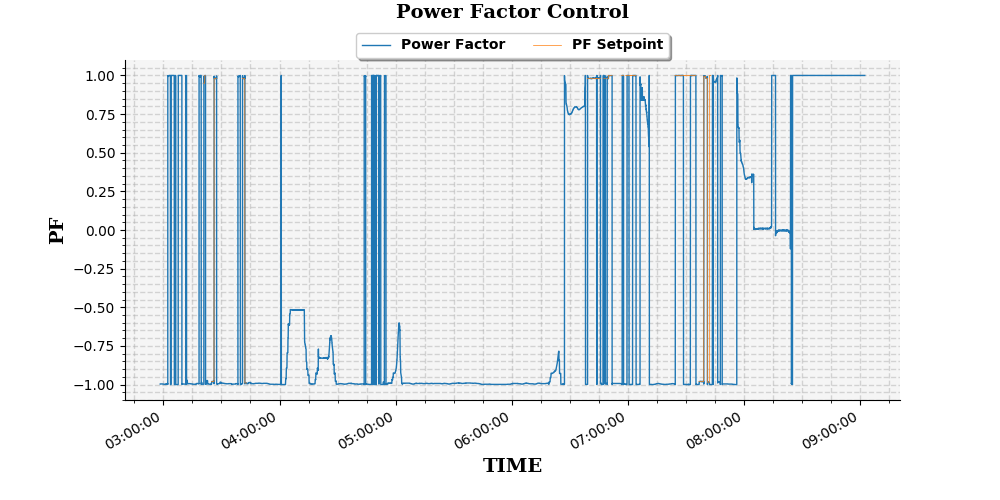

In [5]:
%matplotlib notebook
import plot_maplot_v1
data = plot_maplot_v1.get_data_from_csv('saomai.csv')
(time,m,s,en)=plot_maplot_v1.get_traces(data)
plot_maplot_v1.plot_PF(time,m['PF'],s['PF'],en['PF'],0.002)

<IPython.core.display.Javascript object>


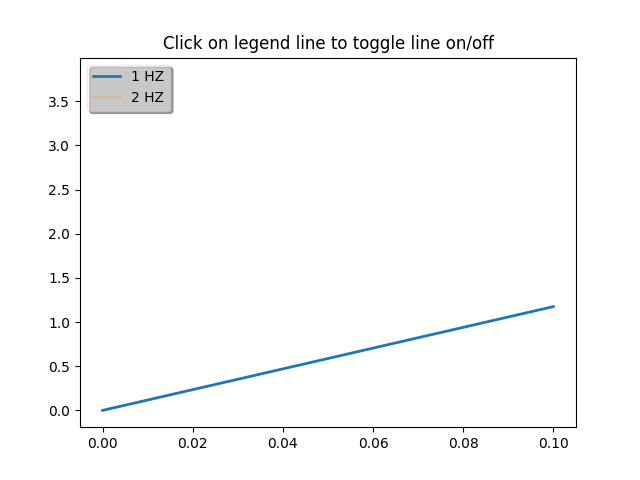

In [3]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

t = np.arange(0.0, 0.2, 0.1)
y1 = 2*np.sin(2*np.pi*t)
y2 = 4*np.sin(2*np.pi*2*t)

fig, ax = plt.subplots()
ax.set_title('Click on legend line to toggle line on/off')
line1, = ax.plot(t, y1, lw=2, label='1 HZ')
line2, = ax.plot(t, y2, lw=2, label='2 HZ')
leg = ax.legend(loc='upper left', fancybox=True, shadow=True)
leg.get_frame().set_alpha(0.4)
leg.set_draggable(True)

# we will set up a dict mapping legend line to orig line, and enable
# picking on the legend line
lines = [line1, line2]
lined = dict()
for legline, origline in zip(leg.get_lines(), lines):
    legline.set_picker(5)  # 5 pts tolerance
    lined[legline] = origline


def onpick(event):
    # on the pick event, find the orig line corresponding to the
    # legend proxy line, and toggle the visibility
    legline = event.artist
    origline = lined[legline]
    vis = not origline.get_visible()
    origline.set_visible(vis)
    # Change the alpha on the line in the legend so we can see what lines
    # have been toggled
    if vis:
        legline.set_alpha(1.0)
    else:
        legline.set_alpha(0.2)
    fig.canvas.draw()

fig.canvas.mpl_connect('pick_event', onpick)

plt.show()

In [8]:
import seaborn as sns
sns.set()

In [23]:
ax.yaxis.tick_left()

<IPython.core.display.Javascript object>


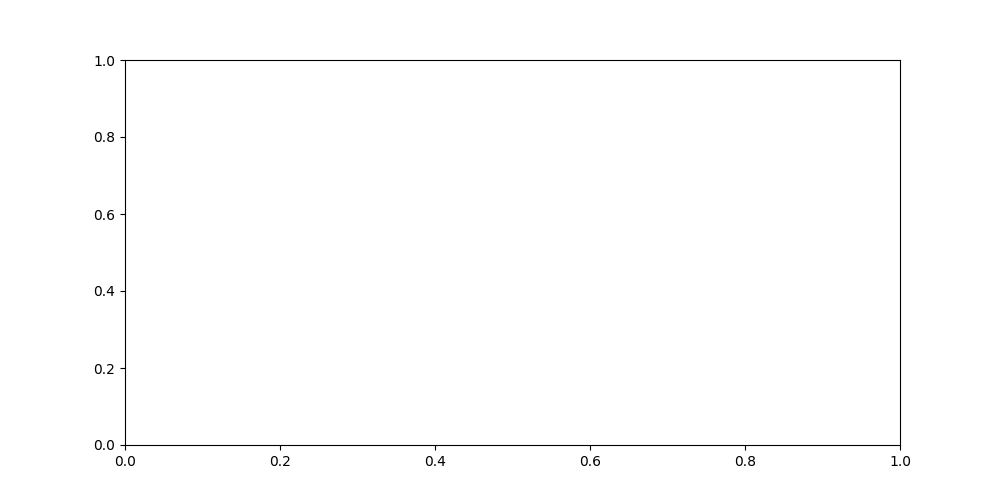

In [88]:
fig, ax = plt.subplots(figsize=(10,5),frameon=False,facecolor='k')
plt.show()

In [85]:
plt.figure?

In [33]:
type(fig)

matplotlib.figure.Figure

In [34]:
fig.figsize

AttributeError: 'Figure' object has no attribute 'figsize'

In [40]:
ax.legend?

In [155]:
def get_data_from_csv(data_csv):
    try:
        data=pd.read_csv(data_csv,delimiter=" ")
        if data.columns[0]!='TIME':
            data=pd.read_csv(data_csv,delimiter=",")
        if data.columns[0]!='TIME':
            data=pd.read_csv(data_csv,delimiter=";")
        if "." in data['TIME'][0]:
            data['TIME']= data['TIME'].str.split(".",n=1,expand=True)[0]
        data.replace("---",np.NaN,inplace=True)
        for col in data.select_dtypes('object').columns:
            try:
                data[col]=data[col].astype(float)
            except ValueError:
                continue
        data = data.round(3)
        data['TIME']=data['TIME'].apply(lambda x : datetime.datetime.strptime(x, '%H:%M:%S'))
        return data
    except FileNotFoundError as e:
        print(e)
        return e
   
        

In [156]:
data=get_data_from_csv('saomai.csv')

In [147]:
data

FileNotFoundError(2, "File b'saomai2.csv' does not exist")

In [140]:
get_traces('saomai.csv')

,TIME,ppc:P0,ppc:F,ppc:Q0,ppc:V0,ppc:PF,apc:En,apc:FCEn,rpc:En,rpc:VCEn,...,pfc:PFSP,apc:PID_Status,rpc:PID_Status,avr:PID_Status,ppc:CSel,apc:CSelOvr_S,rpc:CSelOvr_S,apc:FSrc,apc:FODroop,daynight000:SOL_AVG
0,1900-01-01 02:58:23,49998.0,50.002,-4165.0,118750.000,-0.997,0,0,0,0,...,1.0,0,0,0,0,8,8,0,5.0,556.150
1,1900-01-01 02:58:24,49863.0,50.002,-4130.0,118750.000,-0.997,0,0,0,0,...,1.0,0,0,0,0,8,8,0,5.0,556.150
2,1900-01-01 02:58:25,49863.0,50.002,-4130.0,118766.000,-0.997,0,0,0,0,...,1.0,0,0,0,0,8,8,0,5.0,556.150
3,1900-01-01 02:58:26,50398.0,50.002,-4220.0,118766.000,-0.997,0,0,0,0,...,1.0,0,0,0,0,8,8,0,5.0,556.150
4,1900-01-01 02:58:27,50391.0,50.004,-4214.0,118766.000,-0.997,0,0,0,0,...,1.0,0,0,0,0,8,8,0,5.0,556.150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21831,1900-01-01 09:02:14,9107.0,50.217,62.0,116065.336,1.000,0,0,0,0,...,1.0,0,0,0,0,0,0,0,5.0,118.412
21832,1900-01-01 09:02:15,9100.0,50.219,75.0,116057.000,1.000,0,0,0,0,...,1.0,0,0,0,0,0,0,0,5.0,118.412
21833,1900-01-01 09:02:16,9107.0,50.219,85.0,116057.000,1.000,0,0,0,0,...,1.0,0,0,0,0,0,0,0,5.0,119.062
21834,1900-01-01 09:02:17,9113.0,50.219,73.0,116068.664,1.000,0,0,0,0,...,1.0,0,0,0,0,0,0,0,5.0,119.062


In [176]:
def get_traces(data):

    time =data['TIME']

    P = [l for k in Active for l in data.columns if re.match(k,l)]
    Q = [l for k in Reactive for l in data.columns if re.match(k,l)]
    V = [l for k in Voltage for l in data.columns if re.match(k,l)]
    F = [l for k in Frequency for l in data.columns if re.match(k,l)]
    PF = [l for k in PowerFactor for l in data.columns if re.match(k,l)]

    measurements={"P":data[P[0]],"Q":data[Q[0]],"V":data[V[0]],"F":data[F[0]],"PF":data[PF[0]]}

    PSP = [l for k in Active_Setpoint for l in data.columns if re.match(k,l)]
    QSP = [l for k in Reactive_Setpoint for l in data.columns if re.match(k,l)]
    QV_VSP = [l for k in QV_Setpoint for l in data.columns if re.match(k,l)]
    AVR_VSP = [l for k in AVR_Setpoint for l in data.columns if re.match(k,l)]
    FSP = [l for k in Frequency_Setpoint for l in data.columns if re.match(k,l)]
    PFSP = [l for k in PowerFactor_Setpoint for l in data.columns if re.match(k,l)]

    setpoints={"PSP":data[PSP[0]],"QSP":data[QSP[0]],"QV_VSP":data[QV_VSP[0]],"AVR_VSP":data[AVR_VSP[0]],"FSP":data[FSP[0]],"PFSP":data[PFSP[0]]}

    PEn = [l for k in Active_En for l in data.columns if re.match(k,l)]
    QEn = [l for k in Reactive_En for l in data.columns if re.match(k,l)]
    QVEn = [l for k in QV_En for l in data.columns if re.match(k,l)]
    AVREn = [l for k in AVR_En for l in data.columns if re.match(k,l)]
    FEn = [l for k in Frequency_En for l in data.columns if re.match(k,l)]
    PFEn = [l for k in PowerFactor_En for l in data.columns if re.match(k,l)]

    enables= {"PEn":data[PEn[0]],"QEn":data[QEn[0]],"QVEn":data[QVEn[0]],"AVREn":data[AVREn[0]],"FEn":data[FEn[0]],"PFEn":data[PFEn[0]]}
    return (time,measurements,setpoints,enables)

In [177]:
(time,meas,setp,en)=get_traces(data)

{'P': 0        49998.0
 1        49863.0
 2        49863.0
 3        50398.0
 4        50391.0
           ...   
 21831     9107.0
 21832     9100.0
 21833     9107.0
 21834     9113.0
 21835     9095.0
 Name: ppc:P0, Length: 21836, dtype: float64, 'Q': 0       -4165.0
 1       -4130.0
 2       -4130.0
 3       -4220.0
 4       -4214.0
           ...  
 21831      62.0
 21832      75.0
 21833      85.0
 21834      73.0
 21835      76.0
 Name: ppc:Q0, Length: 21836, dtype: float64, 'V': 0        118750.000
 1        118750.000
 2        118766.000
 3        118766.000
 4        118766.000
             ...    
 21831    116065.336
 21832    116057.000
 21833    116057.000
 21834    116068.664
 21835    116068.664
 Name: ppc:V0, Length: 21836, dtype: float64, 'F': 0        50.002
 1        50.002
 2        50.002
 3        50.002
 4        50.004
           ...  
 21831    50.217
 21832    50.219
 21833    50.219
 21834    50.219
 21835    50.219
 Name: ppc:F, Length: 21836, dtype: float6